In [1]:
from perform_metrics import rank_order_truth_tables_run as rottrun
from perform_metrics import rank_order_truth_tables_stats as rottstats
from perform_metrics import rank_order_truth_tables_viz as rottviz
import os, json
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
datafile = os.path.expanduser("YSround1data/YeastSTATES-1-0-Time-Series-Round-1__fc_etl_stats.csv")
mergefile2 = os.path.expanduser("YSround1data/YeastSTATES-1-0-Time-Series-Round-1__fc_meta.csv")


In [3]:
config = {

    "file_dict" : {"data_file" : (datafile, ["unit","geo_std","n_events_removed","n_events","n_events_outofrange"], []),
                "merge_files" : {mergefile2 : {"drop_cols" : [], "keep_cols" : ["sample_id","control_type","media_type","timepoint","strain_circuit","strain_input_state","cells/mL"]}},
                "join_on" : "sample_id"
                  },
                 
    "transformations" : {
        "log10" : ["geo_mean"]
    },
    
     "filtering_criteria" : {
            "n_events_used" : (2000, "gteq"),
            "channel" : ("BL1-A","eq"),
            "cells/mL" : (1000000, "gteq")
         },
    
    "control_params" : { "pos": "HIGH_FITC","neg" : "EMPTY_VECTOR","control_col" : "control_type","circuit_col" : "strain_circuit", "geo_mean_col" : "geo_mean", "geo_mean_log10" : True },
    
    "circuit_params" : {
      "input_states" : ["00","01","10","11"],
      "input_col" : "strain_input_state",
      "group_cols" : ["strain_circuit","media_type","timepoint"]
      }
}


In [4]:
scores, controls = rottrun.run(config,num_cores=4)
# scores = json.load(open("truth_table_scores.json"))
# controls = json.load(open("truth_table_scores_controls.json"))


/home/bree/anaconda3/envs/sd2-perform_metrics/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
print("Controls fold change: {}".format(controls["fold_change"]))
score_stats_df =  rottstats.make_df(scores,config)
display(HTML(score_stats_df.to_html()))


Controls fold change: 4.78833002351125


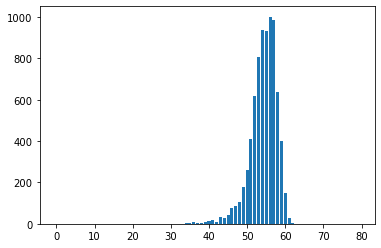

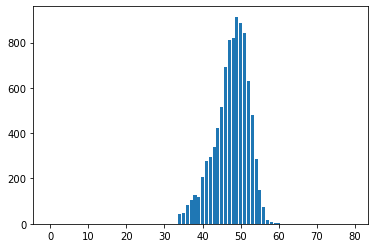

[-0.9499999999999998, -0.8500000000000001, -0.7499999999999999, -0.6499999999999998, -0.5499999999999999, -0.4499999999999999, -0.34999999999999987, -0.24999999999999992, -0.15, -0.04999999999999998, 0.050000000000000044, 0.15000000000000013, 0.25, 0.35000000000000003, 0.45, 0.5499999999999999, 0.6500000000000001, 0.75, 0.85, 0.9500000000000001, 1.05, 1.15, 1.25, 1.3500000000000003, 1.45, 1.5499999999999998, 1.65, 1.75, 1.8500000000000003, 1.9499999999999997, 2.05, 2.1500000000000004, 2.2499999999999996, 2.3500000000000005, 2.45, 2.5499999999999994, 2.65, 2.7499999999999996, 2.85, 2.9499999999999997, 3.05, 3.1500000000000004, 3.2499999999999996, 3.3499999999999996, 3.4499999999999997, 3.5499999999999994, 3.65, 3.7500000000000004, 3.8499999999999996, 3.9499999999999993, 4.050000000000001, 4.15, 4.25, 4.35, 4.449999999999999, 4.55, 4.6499999999999995, 4.75, 4.8500000000000005, 4.95, 5.05, 5.1499999999999995, 5.249999999999999, 5.35, 5.45, 5.550000000000001, 5.65, 5.749999999999999, 5.85,

In [6]:
for h in ["pos","neg"]:
    if h in controls:
        plt.bar(range(len(controls[h])),controls[h])
        plt.show()
        
print(controls["bin_vals"])
        

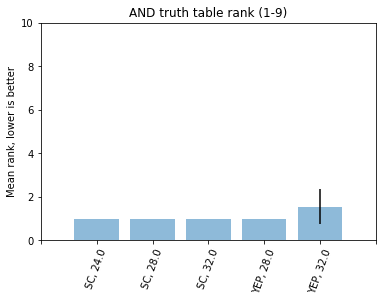

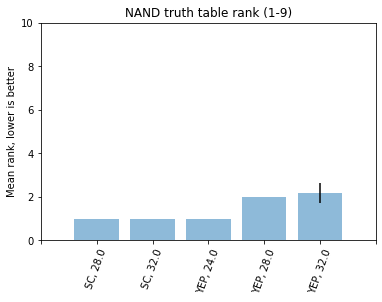

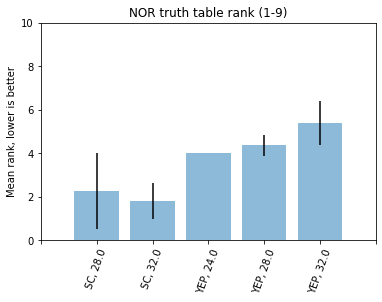

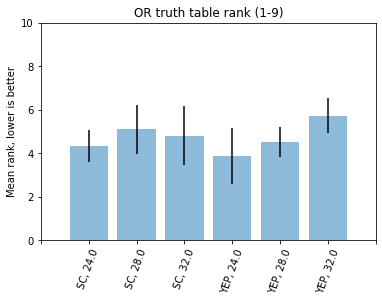

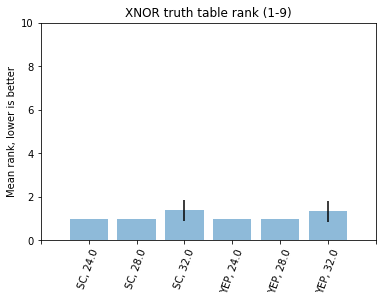

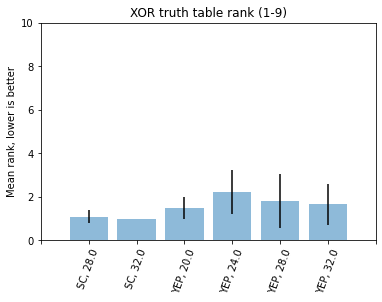

In [7]:
rottviz.plot_stats_df_old(score_stats_df, "strain_circuit", ["media_type","timepoint"], "mean_rank",top=10,customized_labels = rottviz.customize_xlabels_media, show_plot=True)

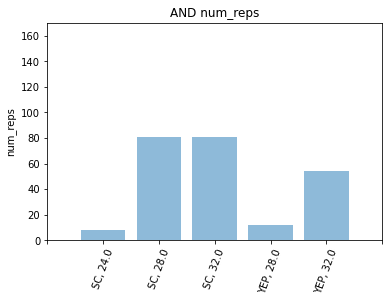

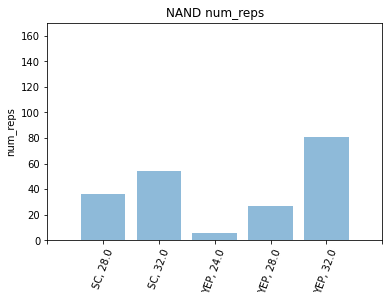

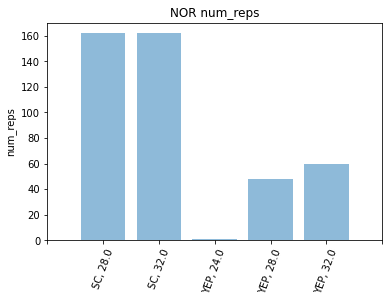

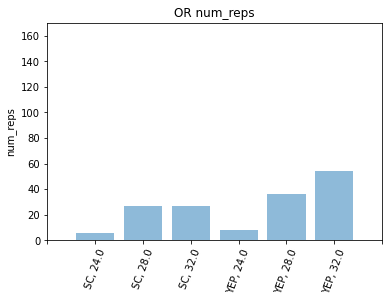

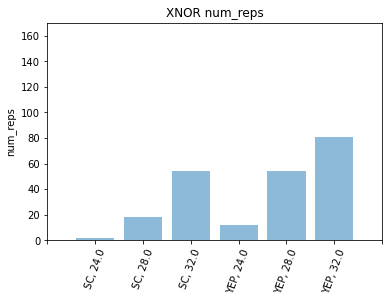

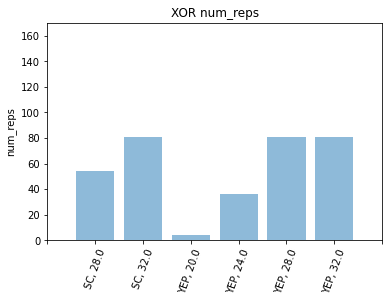

In [8]:
rottviz.plot_stats_df_old(score_stats_df, "strain_circuit", ["media_type","timepoint"], "num_reps",top=170,customized_labels = rottviz.customize_xlabels_media, show_plot=True)

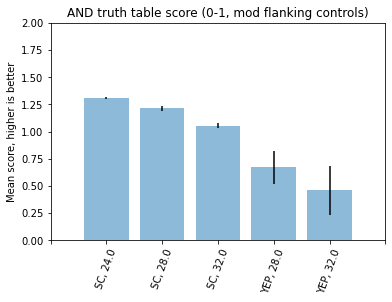

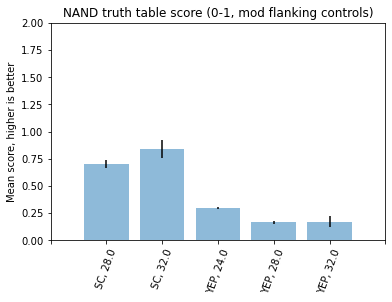

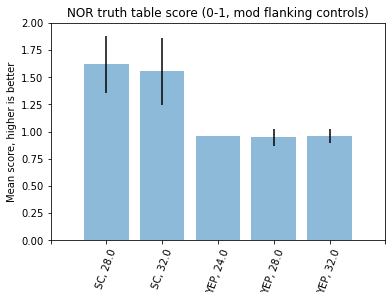

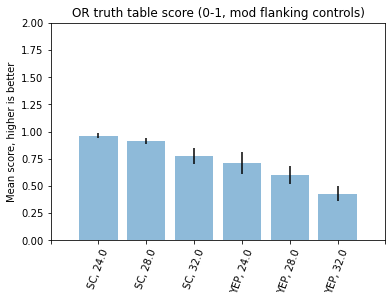

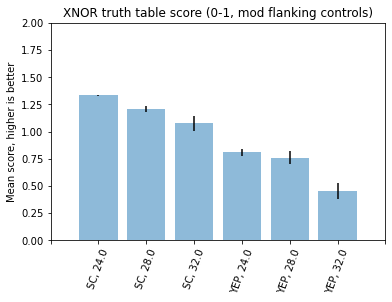

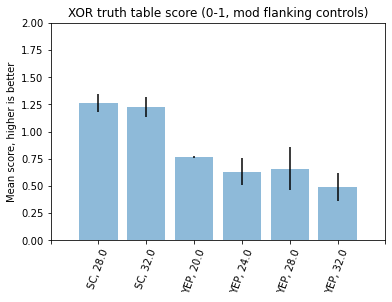

In [9]:
rottviz.plot_stats_df_old(score_stats_df, "strain_circuit", ["media_type","timepoint"], "mean_cut_score",top=2.0,customized_labels = rottviz.customize_xlabels_media, show_plot=True)